Trend_Prediction

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np



#reading the csv file
df= pd.read_csv('/content/trendcast_mini_1000.csv')
print(df)

           hashtag  day_mentions  growth_7d_pct  engagement_rate  \
0          #Foodie          1360           8.15             0.56   
1    #FitnessGoals          4926          18.91             0.27   
2          #SpaceX          2185           3.20             0.52   
3        #Football          5811          39.70             0.45   
4     #Photography          9166          24.86             0.14   
..             ...           ...            ...              ...   
995        #SpaceX           878          25.90             0.25   
996         #AIArt          2254           9.49             0.11   
997        #Health          5917          22.41             0.17   
998    #MovieNight          6318          24.57             0.35   
999        #SpaceX           871          37.42             0.31   

     verified_ratio  is_trend  
0              0.36         0  
1              0.09         0  
2              0.56         0  
3              0.37         1  
4              0.18    

In [2]:
df.head()

,hashtag,day_mentions,growth_7d_pct,engagement_rate,verified_ratio,is_trend
0,#Foodie,1360,8.15,0.56,0.36,0
1,#FitnessGoals,4926,18.91,0.27,0.09,0
2,#SpaceX,2185,3.20,0.52,0.56,0
3,#Football,5811,39.70,0.45,0.37,1
4,#Photography,9166,24.86,0.14,0.18,1


Separate Features and Target

In [6]:
#X = input features used for prediction
#y = target (what we’re trying to predict)

X = df[["day_mentions", "growth_7d_pct", "engagement_rate", "verified_ratio"]]
Y = df["is_trend"]


In [7]:
print(X)

     day_mentions  growth_7d_pct  engagement_rate  verified_ratio
0            1360           8.15             0.56            0.36
1            4926          18.91             0.27            0.09
2            2185           3.20             0.52            0.56
3            5811          39.70             0.45            0.37
4            9166          24.86             0.14            0.18
..            ...            ...              ...             ...
995           878          25.90             0.25            0.52
996          2254           9.49             0.11            0.12
997          5917          22.41             0.17            0.43
998          6318          24.57             0.35            0.50
999           871          37.42             0.31            0.28

[1000 rows x 4 columns]


In [8]:
print(Y)

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: is_trend, Length: 1000, dtype: int64


Train Test Split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
print(X_train)

     day_mentions  growth_7d_pct  engagement_rate  verified_ratio
29           4263          15.18             0.68            0.58
535          3319          32.46             0.36            0.60
695          6818          30.39             0.18            0.20
557          8258           5.01             0.17            0.47
836          7215          18.31             0.63            0.39
..            ...            ...              ...             ...
106          4219          14.78             0.43            0.05
270          5963          17.90             0.69            0.09
860          7608          33.27             0.43            0.20
435          1097          22.89             0.39            0.07
102          5848          10.87             0.50            0.05

[800 rows x 4 columns]


In [13]:
print(X_test)

     day_mentions  growth_7d_pct  engagement_rate  verified_ratio
521          4307          14.28             0.40            0.09
737          6241          15.49             0.45            0.38
740          3726          27.42             0.29            0.57
660          9251           1.26             0.55            0.38
411          3063          20.89             0.52            0.06
..            ...            ...              ...             ...
408          5751          29.16             0.63            0.36
332          3597           9.27             0.45            0.25
208          8878          12.59             0.42            0.29
613          1160          21.15             0.54            0.17
78           8502          33.00             0.47            0.12

[200 rows x 4 columns]


In [14]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 4) (800, 4) (200, 4)


Training the model

In [18]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [19]:
#making predictions
y_pred = model.predict(X_test)


In [20]:
print(y_pred)

[0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1]


Evaluting the model

In [23]:
print("Model Accuracy:", accuracy_score(Y_test, y_pred))

Model Accuracy: 0.955


In [24]:
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       115
           1       0.93      0.96      0.95        85

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



Visualization

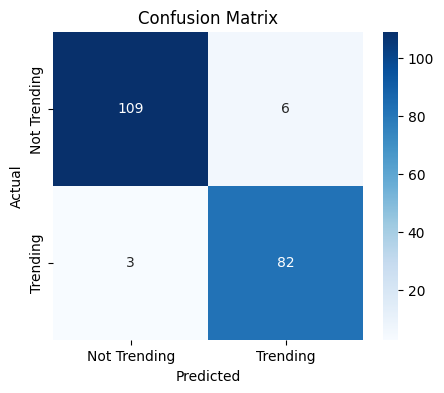

In [26]:
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Trending", "Trending"],
            yticklabels=["Not Trending", "Trending"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

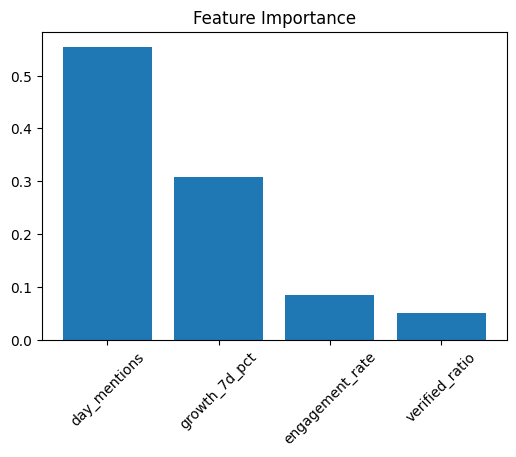

In [27]:
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,4))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.title("Feature Importance")
plt.show()

Now Predicting for new hashtags

In [31]:
new_data = pd.DataFrame({
    "day_mentions": [3000, 9000, 1500],
    "growth_7d_pct": [12.0, 30.0, 5.0],
    "engagement_rate": [0.25, 0.55, 0.15],
    "verified_ratio": [0.10, 0.50, 0.05]
})

new_predictions = model.predict(new_data)

print("\nPredictions for New Hashtags:", new_predictions)
for i, pred in enumerate(new_predictions, start=1):
    status = "Trending" if pred == 1 else "Not Trending "
    print(f"Hashtag #{i} : {status}")



Predictions for New Hashtags: [0 1 0]
Hashtag #1 : Not Trending 
Hashtag #2 : Trending
Hashtag #3 : Not Trending 
